In [9]:

import numpy as np
 
class LogisticRegression:
    def __init__(self, normalize = True, alpha=0.3):
        self.coef_ = 0.0
        self.intercept = 0.
        self.theta = None
        self.normalize = normalize
        self.offset = 1.0
        self.scalar = 1.0
        self.alpha = alpha
        self.iter_count = 0
        self.cost_history=[]
        pass
    
    # e/(1+e^ax)
    def __sigmoid(self, z):        
        epart = np.exp( z )
        return epart / (1 + epart)
 
    #for n feature, x = 0:n, theta = 0:n
    def __hypothetic(self, x):
        z = np.dot(self.theta, x) + self.intercept
        return self.__sigmoid(z)
 
    #distance for single sample or all the samples
    def __error_dist(self, x, y):
        return self.__hypothetic(x) - y
 
    #y log h + (1 - y) log( 1- h )
    def __loglikelihood(self, x, y):
        h = self.__hypothetic(x)
        return y * np.log(h) + (1 - y)*np.log(1 - h)
 
    #J = - mean of likelihood
    def __Jfunction(self):        
        sum = 0
        
        for i in range(0, self.m):
            sum += self.__loglikelihood(self.x[i], self.y[i])
        
        return 1/self.m * sum
 
    #mean of ( h - y ) * x_j = [dist matrix for sample] dot sample
    def __partialderiv_J_func(self,):
 
        h = np.zeros(self.m)        
        for i in range(0, self.m):
            h[i] = self.__hypothetic(self.x[i])
 
        dist = h - self.y
        
        return np.asarray(np.mat(dist.T) * self.x) / self.m
 
        #\frac{1}{m}\sum X^T(\theta_TX-y)
    def __partialderiv_J_func_for_intersect(self):
        sum = 0
 
        for i in range(0, self.m):
            err = self.__error_dist(self.x[i], self.y[i])
            sum += err
   
        return 1/self.m * sum
 
    #\theta = \theta - \alpha * \partial costfunction
    def __gradient_descent(self):
        cost = 100000.0
        last_cost = 200000.0
        threshold = 0.01
 
        self.iter_count = 0
        #repeat until convergence
        while abs(cost - last_cost) > 0.0001:
            last_cost = cost
            self.theta = self.theta - self.alpha * self.__partialderiv_J_func()
            self.intercept = self.intercept - self.alpha * self.__partialderiv_J_func_for_intersect()
            cost = -self.__Jfunction()
            self.cost_history.append(cost)
            print('iter=%d deltaCost=%f'%(self.iter_count, last_cost - cost))
            self.iter_count += 1
 
 
    def __calculate_norm_params(self, x):
        offset = np.zeros(self.n_feature)
        scalar = np.ones(self.n_feature)
        for feature_idx in range(0, self.n_feature):
            col = x[:, np.newaxis, feature_idx]
            min = col.min()
            max = col.max()
            mean = col.mean()
 
            if( min != max):
                scalar[feature_idx] = 1.0/(max - min)
            else:
                scalar[feature_idx] = 1.0/max
            
            offset[feature_idx] = mean
 
        return offset, scalar
 
    def __normalize(self, x):
        return (x - self.offset) * self.scalar       
 
    
    def fit(self, x, y):
        if x.shape[0] != y.shape[0]:
            raise 'x, y have different length!'
     
        self.m = x.shape[0]
        self.n_feature = x.shape[1]
        self.theta = np.zeros(x[0].size)
 
        if self.normalize:
            self.offset, self.scalar = self.__calculate_norm_params(x)
            self.x = self.__normalize(x)
        else:
            self.x = x
 
        self.y = y 
        
        self.__gradient_descent()
 
        self.coef_ = self.theta
        pass
 
    def predict(self, x):
        y_pred = []
        for element in x:
            xi = element
            if self.normalize:
                xi = self.__normalize(element)
 
            y_pred.append(self.__hypothetic(xi))
 
        return y_pred

(200, 2)


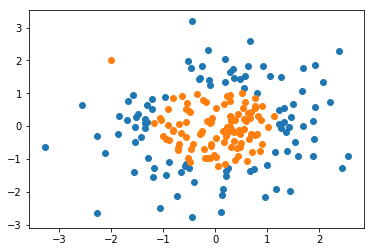

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import numpy as np
import matplotlib.pyplot as plt

np.random.seed(233)
X = np.random.normal(0, 1, size=(200, 2))
print(X.shape)
y = np.array(X[:, 0] ** 2 + X[:, 1] ** 2 < 1.5, dtype='int')

XCopy = list(X)
XCopy.append(np.array([-2, 2]))
X = np.array(XCopy)
y = np.append(y, 1)
# print(X)
# print(y)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()
#

In [13]:
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
#
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
# print(logReg.score(X_train, y_train))
# score = logReg.score(X_test, y_test)
# print(score)

iter=0 deltaCost=99999.306876
iter=1 deltaCost=0.000021


D:\Application\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


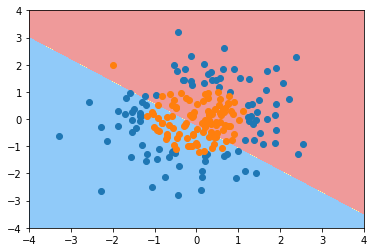

In [4]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


plot_decision_boundary(logReg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

D:\Application\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9411764705882353


D:\Application\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


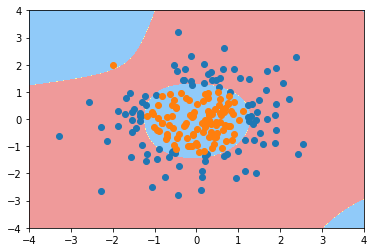

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# 多项式逻辑回归代价函数
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('logReg', LogisticRegression())
    ])


polyLogReg = PolynomialLogisticRegression(degree=6)
polyLogReg.fit(X_train, y_train)
# polyLogReg.score(X_train, y_train)
print(polyLogReg.score(X_test, y_test))
plot_decision_boundary(polyLogReg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()


D:\Application\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Application\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


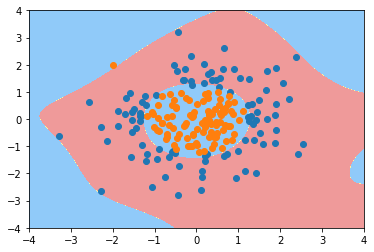

In [6]:
polyLogReg2 = PolynomialLogisticRegression(degree=15)
polyLogReg2.fit(X_train, y_train)
polyLogReg2.score(X_train, y_train)
polyLogReg2.score(X_test, y_test)
plot_decision_boundary(polyLogReg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()


D:\Application\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Application\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


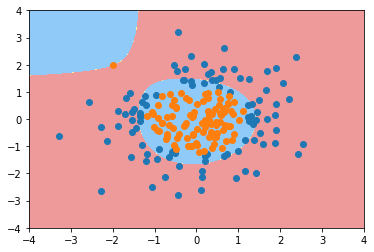

In [8]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('logReg', LogisticRegression(C=C))
    ])


poly_logReg3 = PolynomialLogisticRegression(degree=6, C=0.1)
poly_logReg3.fit(X_train, y_train)
poly_logReg3.score(X_train, y_train)
poly_logReg3.score(X_test, y_test)
plot_decision_boundary(poly_logReg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()
